In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
m=pd.read_csv("D:/USC/ISE534/k/machine.csv")

In [3]:
#根据在线时间和平均移动距离，人为分辨等级
hour_int=[]
for i in range(len(m["Stay_duration"])):
    hour_int.append(int(m["Stay_duration"][i]))

In [4]:
freq_dict=Counter(hour_int)
print(freq_dict)

Counter({4: 273, 3: 265, 5: 188, 6: 154, 7: 102, 8: 49, 2: 48, 9: 27, 10: 19, 11: 12, 15: 10, 18: 5, 12: 5, 16: 5, 13: 3, 19: 3, 17: 2, 20: 2, 14: 1, 21: 1, 22: 1, 1: 1})


In [5]:
#9小时作为分界点
hour8_10=m[m.Stay_duration.between(8,10)]
hour8_10["latstd+lngstd"]=hour8_10["lat_std"]+hour8_10["lng_std"]
hour8_10=hour8_10[["Stay_duration","lat_std","lng_std"]]

#计算lat_std和lng_std的平方和
hour8_10["std_square_sum"]=hour8_10["lat_std"]*hour8_10["lat_std"]+hour8_10["lng_std"]*hour8_10["lng_std"]

C:\Users\13929\AppData\Local\Temp/ipykernel_5112/2885179587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour8_10["latstd+lngstd"]=hour8_10["lat_std"]+hour8_10["lng_std"]


<AxesSubplot:>

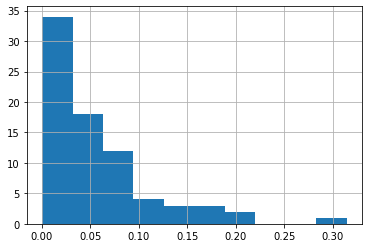

In [7]:
hour8_10["std_square_sum"].hist()

0.1作为分界线

Stay_Duration 小于8的   类别A

Stay_Duration 大于10的  类别B

在两者之间的：lat_std和lng_std的平方和大于0.1的  类别A，   否则  类别B

In [10]:
m["std_square_sum"]=m["lat_std"]*m["lat_std"]+m["lng_std"]*m["lng_std"]

In [13]:
for i in range(len(m["lat_std"])):
    if m["Stay_duration"][i]<=8:
        m["machine_label"]="A"
    elif m["Stay_duration"][i]>=10:
        m["machine_label"]="B"
    else:
        if m["std_square_sum"][i]>0.1:
            m["machine_label"]="A" 
        else:
            m["machine_label"]="B"

In [15]:
m

,Id,ClientMacAddr,Freq_per_day,lat_std,Stay_duration,lng_std,Category,Floor,std_square_sum,machine_label
0,4,00:23:a7:e7:96:0c,5378.699258,0.033894,15.371143,0.021194,1,0,0.001598,A
1,5,00:23:a7:e7:a8:1c,5080.000000,0.008490,15.000000,0.007667,1,0,0.000131,A
2,6,00:26:c6:6d:02:3e,5470.924428,0.048923,15.787148,0.031102,1,0,0.003361,A
3,7,00:28:f8:26:ae:e4,5226.495092,0.018679,15.381769,0.010157,1,0,0.000452,A
4,8,00:80:92:df:7b:97,3905.074778,0.039068,11.450048,0.031565,1,0,0.002523,A
...,...,...,...,...,...,...,...,...,...,...
1171,2039,e4:a7:a0:99:bd:e9,493.000000,0.024648,3.000000,0.106408,1,3,0.011930,A
1172,2046,e4:a7:a0:99:dd:ec,641.000000,0.033193,3.000000,0.096531,1,3,0.010420,A
1173,2063,f0:8a:76:f7:3f:e4,1097.879286,0.043205,11.354157,0.156187,1,3,0.026261,A
1174,2066,f4:0e:22:b7:d5:d9,2906.814953,0.043978,10.436582,0.151363,1,3,0.024845,A
